In [1]:
import numpy as np

In [2]:
num_points = 100
vectors_set = []

for i in xrange(num_points) :
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


* 이 코드는 __y = 0.1 * x + 0.3__ 관계를 가지는 데이터를 생성
* __numpy의 정규분포 함수__를 사용하였으며 약간의 변동값을 더해 직선과 완전히 일치하게 하지는 않음  

![텍스트](http://cfile8.uf.tistory.com/image/230AF740588EA783191149)



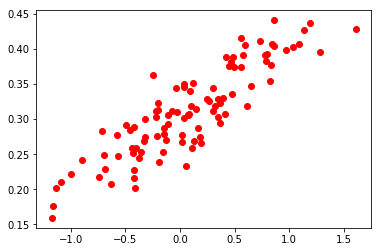

In [3]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.show()

* matplotlib가 필요함
> pip install matplotlib

In [4]:
import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -0.1, -0.1))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# init = tf.global_variables_initializer()
init = tf.initialize_all_variables()

W_hist = tf.summary.histogram("W", W)
b_hist = tf.summary.histogram("b", b)
loss_scalar = tf.summary.scalar("loss", loss)

with tf.Session() as sess :
  sess = tf.Session()
  sess.run(init)
    
  merged = tf.summary.merge([W_hist, b_hist, loss_scalar])
    
  # step 3: writer 생성
  writer = tf.summary.FileWriter("./board/sample_4", sess.graph)
    
  for step in xrange(8) :
    summary_str, _ = sess.run([merged, train])
    writer.add_summary(summary_str, step)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
